# **Credit card fraud detection**

**Importing library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.simplefilter("ignore")

**Loading Data**


In [2]:
train_df = pd.read_csv('/content/fraudTrain.csv', index_col='Unnamed: 0')
test_df = pd.read_csv('/content/fraudTrain.csv', index_col='Unnamed: 0')

**Exploratory Data Analysis**

In [4]:
train_df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159234 entries, 0 to 159233
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  159234 non-null  object 
 1   cc_num                 159234 non-null  int64  
 2   merchant               159234 non-null  object 
 3   category               159234 non-null  object 
 4   amt                    159233 non-null  float64
 5   first                  159233 non-null  object 
 6   last                   159233 non-null  object 
 7   gender                 159233 non-null  object 
 8   street                 159233 non-null  object 
 9   city                   159233 non-null  object 
 10  state                  159233 non-null  object 
 11  zip                    159233 non-null  float64
 12  lat                    159233 non-null  float64
 13  long                   159233 non-null  float64
 14  city_pop               159233 non-nu

In [7]:
train_df.shape

(159234, 22)

In [8]:
is_fraud = train_df["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

Yes:  1445
No:  157788


In [42]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)


In [43]:
print(train_df.isna().sum().sum())
print(train_df.duplicated().sum())

0
0


In [44]:
fraud_counts = train_df['is_fraud'].value_counts()

fig = px.pie(names=fraud_counts.index, values=fraud_counts.values, title='Fraudulent Transactions Distribution')

fig.show()

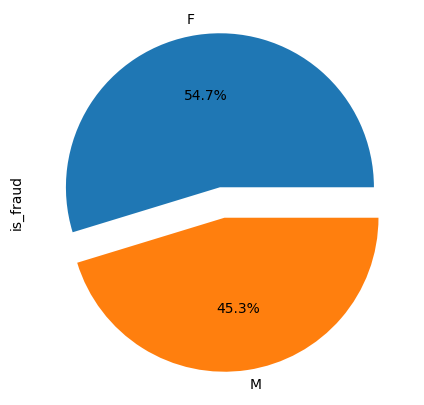

In [45]:
fig = plt.subplots(figsize=(5, 5))

#Gender Distribution
explode = [0.1, 0.1]
train_df.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",);

# Show the plot
plt.show()

**Data Encoding**

In [46]:
le = LabelEncoder()
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = le.fit_transform(train_df[column])

In [47]:
train_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,514,8,4.97,155,18,0,540,505,...,36.0788,-81.1781,3495.0,359,735,6874,1.325376e+09,36.011293,-82.048315,0.0
1,1,630423337322,241,4,107.23,299,155,0,415,581,...,48.8878,-118.2105,149.0,415,563,19532,1.325376e+09,49.159047,-118.186462,0.0
2,2,38859492057661,390,0,220.11,108,376,1,574,451,...,42.1808,-112.2620,4154.0,297,271,100270,1.325376e+09,43.150704,-112.154481,0.0


In [57]:
#Downsampling
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
No_class = train_df[train_df["is_fraud"]==0]
yes_class = train_df[train_df["is_fraud"]==1]

No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)


X = down_samples.drop("is_fraud", axis=1)
y = down_samples["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Machine Learning Model**

**1. Logistic Regression**

In [58]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86       297
         1.0       0.92      0.74      0.82       281

    accuracy                           0.84       578
   macro avg       0.86      0.84      0.84       578
weighted avg       0.85      0.84      0.84       578

Logistic Regression accuracy is: 84.26%


**2. Decision Tree**

In [59]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(X_train, y_train)
predict_ID3 = DT.predict(X_test)
print(classification_report(y_test, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87       297
         1.0       0.95      0.73      0.82       281

    accuracy                           0.85       578
   macro avg       0.87      0.84      0.84       578
weighted avg       0.87      0.85      0.85       578

ID3 model accuracy is: 84.78%


**3. Random Forest Classifier**

In [60]:
# Initialize and train the Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       297
         1.0       0.95      0.92      0.93       281

    accuracy                           0.94       578
   macro avg       0.94      0.94      0.94       578
weighted avg       0.94      0.94      0.94       578

Random Forest model accuracy is: 93.77%


**Comparing Accuaracies of Different Algorithms**

In [64]:
Algorithms = ['RandomForest', 'Decision Tree', 'Logistic Regression']
accuracy = [RF_accuracy, ID3_accuracy, LR_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,RandomForest,0.937716
1,Decision Tree,0.847751
2,Logistic Regression,0.842561


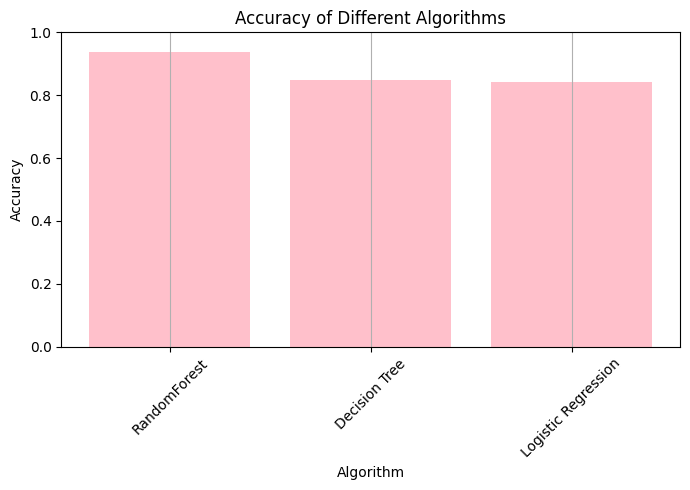

In [66]:
plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color='pink')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()